In [ ]:
import sklearn
from sklearn.datasets import make_circles


n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

print(f"First 5 sample of X: {X[:5]}")
print(f"First 5 sample of y: {y[:5]}")

First 5 sample of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 sample of y: [1 1 1 1 0]


In [ ]:
import pandas as pd
circles = pd.DataFrame({"Feature 1": X[:, 0],
                        "Feature 2": X[:, 1],
                        "Target": y})
circles.head(10)

,Feature 1,Feature 2,Target
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


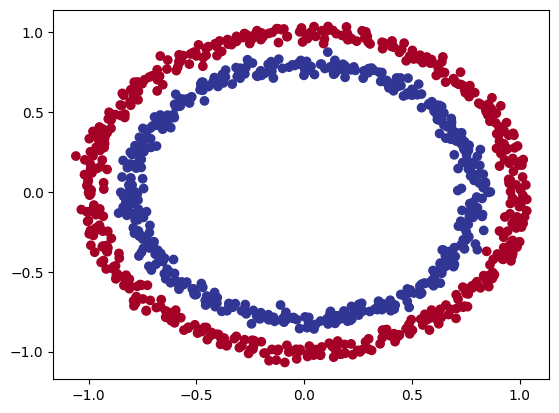

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

Note: The data we're working on ofeten is reffered as a toy dataset


In [ ]:
# 1.1 check input and output shape
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
X_sample = X[0]
y_sample = y[0]

print(f"Sample input of X: {X_sample} and sample output of y: {y_sample}")
print(f"Sample input of Y: {y_sample.shape} and the same for the y: {y_sample.shape}")

Sample input of X: [0.75424625 0.23148074] and sample output of y: 1
Sample input of Y: () and the same for the y: ()


In [ ]:
# Turn data into tensors creare train and test
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
# building a model

import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"


In [ ]:
# 1. Subcalss 'nn.module'
# 2.Create 2 'nn.Linear
# 3 Define a 'forward'

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # Create a 2 nn.linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # match the our feature to the seocnd layer in features
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

def forward(self, x: torch.Tensor) -> torch.Tensor:
  return self.layer_2(self.layer_1(x))

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.3507,  0.1594],
        [ 0.2088,  0.4786],
        [-0.2474, -0.0107],
        [ 0.6645, -0.0117],
        [ 0.0375,  0.2966]], requires_grad=True)

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1579, -0.6932],
                      [ 0.1698, -0.0267],
                      [ 0.3787,  0.1528],
                      [ 0.4091, -0.1212],
                      [-0.5498,  0.3541]])),
             ('0.bias', tensor([-0.7044,  0.5315,  0.3743, -0.0790, -0.2562])),
             ('1.weight',
              tensor([[ 0.4382,  0.3105,  0.0979, -0.0863, -0.3221]])),
             ('1.bias', tensor([0.0214]))])

In [ ]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Untrained predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Lenght of the test samples: {len(X_test)}, Shape:{X_test.shape}")
print(f"First 10 predictions: {torch.round(untrained_preds[:10])}")
print(f"First 10 test samples: {y_test[:10]}")

Untrained predictions: 200, shape: torch.Size([200, 1])
Lenght of the test samples: 200, Shape:torch.Size([200, 2])
First 10 predictions: tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [-0.]])
First 10 test samples: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
# Setup loss function and optimizr

# for regression MAE or MSE
# for classification binary cross entropy
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params =model_0.parameters(),
                            lr = 0.1)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
#Going from raw logits -> predicitions
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits



tensor([[-0.3307],
        [-0.3784],
        [ 0.0158],
        [-0.4297],
        [ 0.3671]])

In [ ]:
y_pred_probs = torch.round(torch.sigmoid(y_logits))
y_pred_probs

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]])

In [ ]:
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

In [ ]:
torch.manual_seed(42)
epochs = 1000

X_train,y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))


  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}")

Epoch: 0 | Loss: 0.70459 | Accuracy: 49.50% | Test Loss: 0.69532 | Test Accuracy: 51.50
Epoch: 10 | Loss: 0.70236 | Accuracy: 49.38% | Test Loss: 0.69416 | Test Accuracy: 51.50
Epoch: 20 | Loss: 0.70068 | Accuracy: 49.50% | Test Loss: 0.69336 | Test Accuracy: 51.50
Epoch: 30 | Loss: 0.69938 | Accuracy: 49.62% | Test Loss: 0.69281 | Test Accuracy: 51.00
Epoch: 40 | Loss: 0.69836 | Accuracy: 49.75% | Test Loss: 0.69242 | Test Accuracy: 51.00
Epoch: 50 | Loss: 0.69754 | Accuracy: 50.00% | Test Loss: 0.69216 | Test Accuracy: 51.00
Epoch: 60 | Loss: 0.69687 | Accuracy: 50.12% | Test Loss: 0.69197 | Test Accuracy: 51.00
Epoch: 70 | Loss: 0.69633 | Accuracy: 50.12% | Test Loss: 0.69186 | Test Accuracy: 51.00
Epoch: 80 | Loss: 0.69588 | Accuracy: 50.00% | Test Loss: 0.69179 | Test Accuracy: 50.50
Epoch: 90 | Loss: 0.69550 | Accuracy: 49.88% | Test Loss: 0.69175 | Test Accuracy: 50.50
Epoch: 100 | Loss: 0.69518 | Accuracy: 49.75% | Test Loss: 0.69175 | Test Accuracy: 50.50
Epoch: 110 | Loss: 0.

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

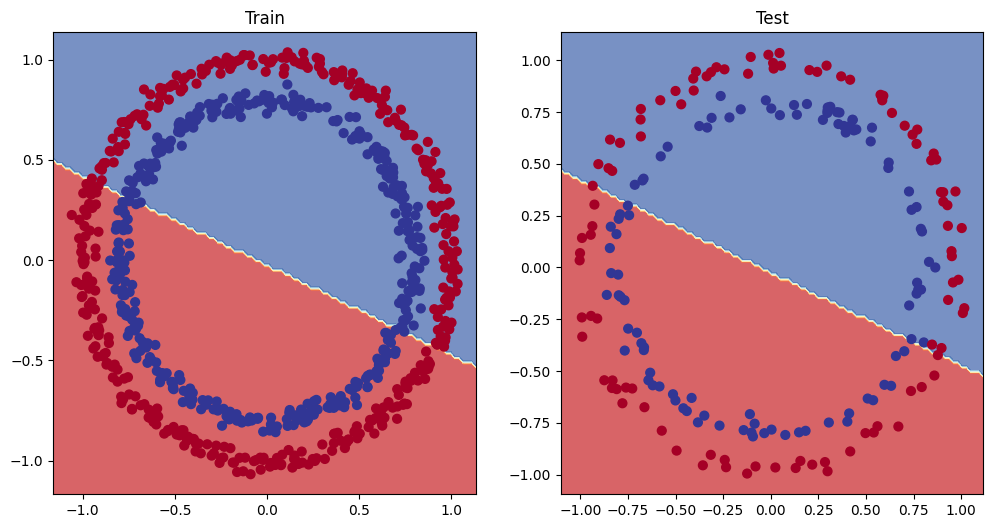

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1837, -0.5004],
                      [ 0.1539,  0.1726],
                      [ 0.3752,  0.2324],
                      [ 0.4123, -0.2339],
                      [-0.5309,  0.2362]])),
             ('0.bias', tensor([-0.7387,  0.4923,  0.3577, -0.0547, -0.2364])),
             ('1.weight',
              tensor([[ 0.1425,  0.2831,  0.1595, -0.2166, -0.0647]])),
             ('1.bias', tensor([-0.1171]))])

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

def forward(self,x):
  #z = self.layer_1(x)
  #z = torch.relu(z)
  #z = self.layer_2(z)
  #z = torch.relu(z)
  #z = self.layer_3(z)
  return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss funcion
loss_fn = nn.BCEWithLogitsLoss()


# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
# %%
import torch
from torch import nn
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self,x): # the method is inside the class
    #z = self.layer_1(x)
    #z = torch.relu(z)
    #z = self.layer_2(z)
    #z = torch.relu(z)
    #z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

# %%
# Create a loss funcion
loss_fn = nn.BCEWithLogitsLoss()


# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)
# %%
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc
# %%

torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000
# get all variables
X_train = torch.from_numpy(X_train.cpu().numpy()).type(torch.float).to(device)
y_train = torch.from_numpy(y_train.cpu().numpy()).type(torch.float).to(device)
X_test = torch.from_numpy(X_test.cpu().numpy()).type(torch.float).to(device)
y_test = torch.from_numpy(y_test.cpu().numpy()).type(torch.float).to(device)

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))


  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}")

Epoch: 0 | Loss: 0.69528 | Accuracy: 51.38% | Test Loss: 0.69252 | Test Accuracy: 50.50
Epoch: 10 | Loss: 0.69448 | Accuracy: 50.75% | Test Loss: 0.69230 | Test Accuracy: 51.00
Epoch: 20 | Loss: 0.69408 | Accuracy: 50.25% | Test Loss: 0.69227 | Test Accuracy: 50.50
Epoch: 30 | Loss: 0.69383 | Accuracy: 49.38% | Test Loss: 0.69231 | Test Accuracy: 50.50
Epoch: 40 | Loss: 0.69367 | Accuracy: 49.25% | Test Loss: 0.69237 | Test Accuracy: 50.50
Epoch: 50 | Loss: 0.69355 | Accuracy: 48.88% | Test Loss: 0.69244 | Test Accuracy: 51.00
Epoch: 60 | Loss: 0.69346 | Accuracy: 49.00% | Test Loss: 0.69252 | Test Accuracy: 50.50
Epoch: 70 | Loss: 0.69339 | Accuracy: 48.75% | Test Loss: 0.69260 | Test Accuracy: 52.00
Epoch: 80 | Loss: 0.69333 | Accuracy: 48.25% | Test Loss: 0.69267 | Test Accuracy: 52.50
Epoch: 90 | Loss: 0.69329 | Accuracy: 48.50% | Test Loss: 0.69275 | Test Accuracy: 51.50
Epoch: 100 | Loss: 0.69325 | Accuracy: 47.88% | Test Loss: 0.69283 | Test Accuracy: 51.00
Epoch: 110 | Loss: 0.

In [ ]:
# Preparing data to see the if our model can fit a straight line

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:10], y_regression[:10]



100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [ ]:
train_split = int(0.8 * len(X_regression))
X_train_reg = X_regression[:train_split]
y_train_reg = y_regression[:train_split]

X_test_reg = X_regression[train_split:]
y_test_reg = y_regression[train_split:]

len(X_train_reg), len(y_train_reg), len(X_test_reg), len(y_test_reg)


(80, 80, 20, 20)

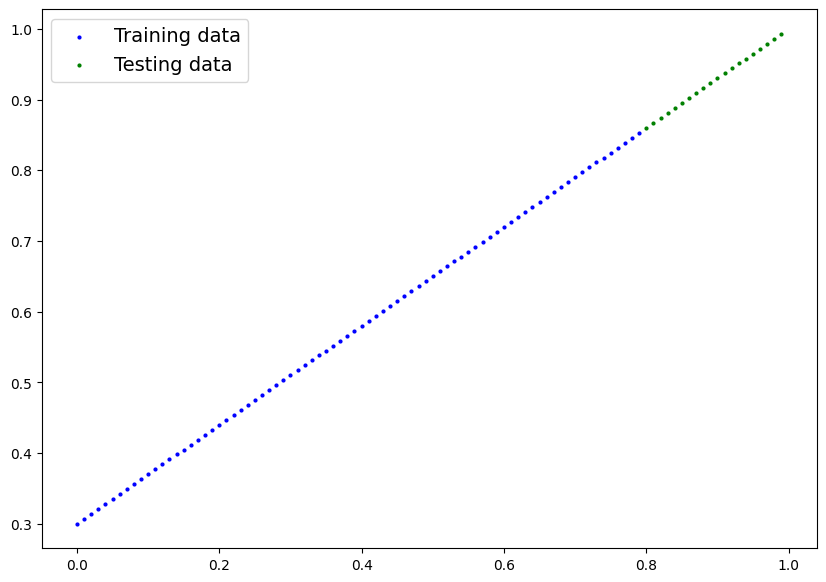

In [ ]:
plot_predictions(train_data=X_train_reg,
                 train_labels=y_train_reg,
                 test_data=X_test_reg,
                 test_labels=y_test_reg,
                 predictions=None)

In [ ]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=100),
    nn.Linear(in_features=100, out_features=100),
    nn.Linear(in_features=100, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=100, bias=True)
  (2): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train_reg = X_train_reg.to(device)
y_train_reg = y_train_reg.to(device)
X_test_reg = X_test_reg.to(device)
y_test_reg = y_test_reg.to(device)

for epoch in range(epochs):
  y_pred = model_2(X_train_reg)
  loss = loss_fn(y_pred, y_train_reg)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval
  with torch.inference_mode():
    test_pred = model_2(X_test_reg)
    test_loss = loss_fn(test_pred, y_test_reg)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.29054 | Test Loss: 0.20415
Epoch: 100 | Loss: 0.07617 | Test Loss: 0.24513
Epoch: 200 | Loss: 0.05762 | Test Loss: 0.18546
Epoch: 300 | Loss: 0.04381 | Test Loss: 0.14362
Epoch: 400 | Loss: 0.03516 | Test Loss: 0.12093
Epoch: 500 | Loss: 0.02967 | Test Loss: 0.10695
Epoch: 600 | Loss: 0.03103 | Test Loss: 0.08963
Epoch: 700 | Loss: 0.02221 | Test Loss: 0.08982
Epoch: 800 | Loss: 0.02587 | Test Loss: 0.07437
Epoch: 900 | Loss: 0.01742 | Test Loss: 0.07725


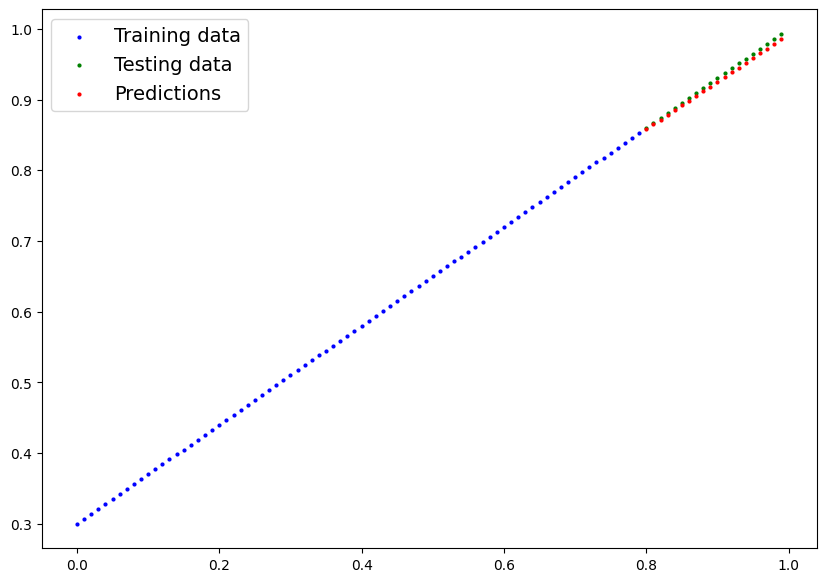

In [ ]:
# Make sure to import the necessary libraries
import torch
import matplotlib.pyplot as plt
from torch import nn
from helper_functions import plot_predictions
from numpy import array
# ensure the model is in eval mode
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_reg)
  plot_predictions(train_data=X_train_reg.cpu().numpy(), #move the tensor to the cpu and convert it to numpy
                   train_labels=y_train_reg.cpu().numpy(), #move the tensor to the cpu and convert it to numpy
                   test_data=X_test_reg.cpu().numpy(), #move the tensor to the cpu and convert it to numpy
                   test_labels=y_test_reg.cpu().numpy(),#move the tensor to the cpu and convert it to numpy
                   predictions=y_preds.cpu().numpy())#move the tensor to the cpu and convert it to numpy

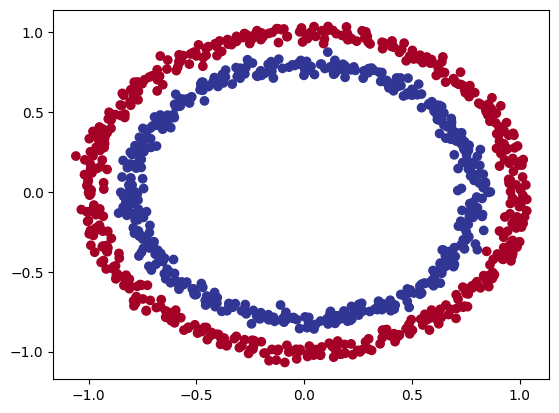

In [ ]:
# non linearity

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np
import torch
from torch import nn


n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
import torch
from torch import nn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# non linearity
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=42)
# Define the class
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Define the layers
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    # Implement the forward pass
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

# Instantiate the model after the class definition
model_3 = CircleModelV2().to(device)

# Create a loss funcion
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.Adam(params=model_3.parameters(), # Changed to Adam
                            lr=0.01) # Adjust the learning rate

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Move data to device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss and accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}")

Epoch: 0 | Loss: 0.69295 | Accuracy: 50.00% | Test Loss: 0.69203 | Test Accuracy: 55.50
Epoch: 100 | Loss: 0.17334 | Accuracy: 99.62% | Test Loss: 0.20684 | Test Accuracy: 99.00
Epoch: 200 | Loss: 0.01503 | Accuracy: 100.00% | Test Loss: 0.02743 | Test Accuracy: 100.00
Epoch: 300 | Loss: 0.00581 | Accuracy: 100.00% | Test Loss: 0.01481 | Test Accuracy: 100.00
Epoch: 400 | Loss: 0.00317 | Accuracy: 100.00% | Test Loss: 0.01065 | Test Accuracy: 100.00
Epoch: 500 | Loss: 0.00200 | Accuracy: 100.00% | Test Loss: 0.00874 | Test Accuracy: 100.00
Epoch: 600 | Loss: 0.00138 | Accuracy: 100.00% | Test Loss: 0.00754 | Test Accuracy: 100.00
Epoch: 700 | Loss: 0.00101 | Accuracy: 100.00% | Test Loss: 0.00677 | Test Accuracy: 100.00
Epoch: 800 | Loss: 0.00076 | Accuracy: 100.00% | Test Loss: 0.00622 | Test Accuracy: 100.00
Epoch: 900 | Loss: 0.00060 | Accuracy: 100.00% | Test Loss: 0.00579 | Test Accuracy: 100.00


In [ ]:
model_3.eval()
with torch.inference_mode():
  y_logits = model_3(X_test).squeeze()
  y_preds = torch.round(torch.sigmoid(model_3(X_test).squeeze()))

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

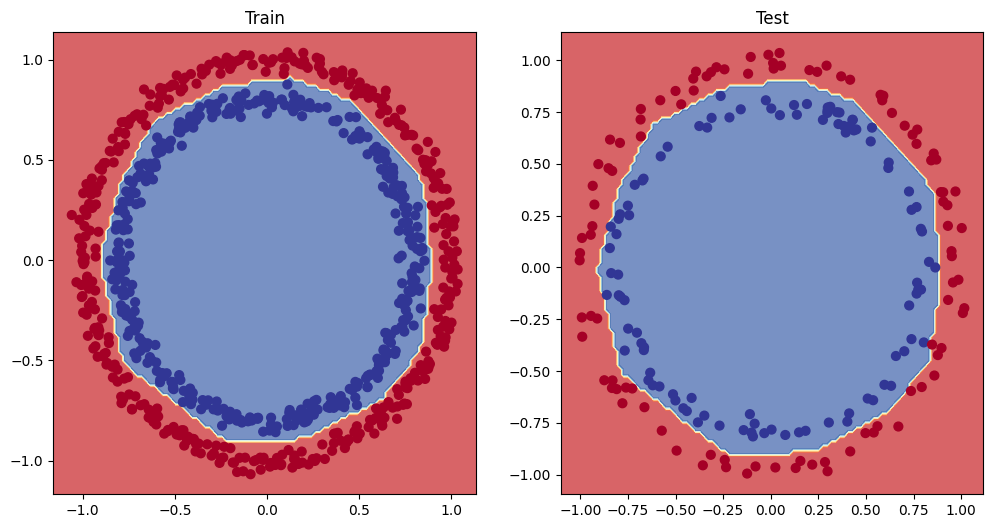

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)


In [ ]:
# 7 REPLICATING Non_linear activation functions
A = torch.arange(-10, 10, 1).unsqueeze(dim=1).float()
A.dtype

torch.float32

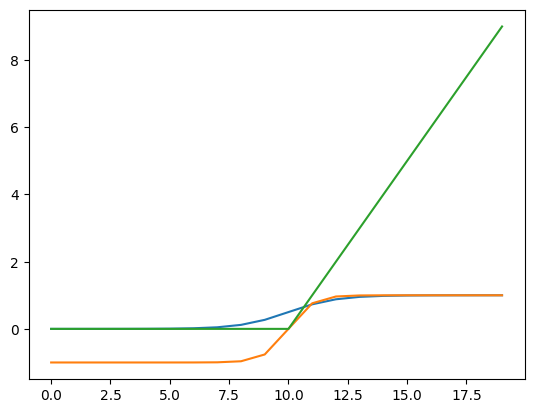

In [ ]:
plt.plot(torch.sigmoid(A))
plt.plot(torch.tanh(A))
plt.plot(torch.relu(A))

In [ ]:
A

tensor([[-10.],
        [ -9.],
        [ -8.],
        [ -7.],
        [ -6.],
        [ -5.],
        [ -4.],
        [ -3.],
        [ -2.],
        [ -1.],
        [  0.],
        [  1.],
        [  2.],
        [  3.],
        [  4.],
        [  5.],
        [  6.],
        [  7.],
        [  8.],
        [  9.]])

In [ ]:
def relu(x):
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

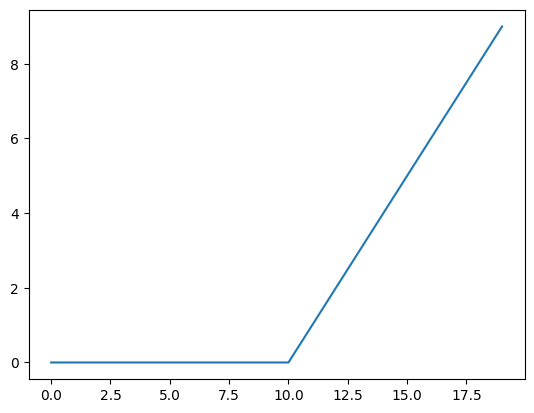

In [ ]:
plt.plot(relu(A))

In [ ]:
def sigomoid(x):
  return 1 / (1 + torch.exp(-x))

sigomoid(A)

tensor([[4.5398e-05],
        [1.2339e-04],
        [3.3535e-04],
        [9.1105e-04],
        [2.4726e-03],
        [6.6929e-03],
        [1.7986e-02],
        [4.7426e-02],
        [1.1920e-01],
        [2.6894e-01],
        [5.0000e-01],
        [7.3106e-01],
        [8.8080e-01],
        [9.5257e-01],
        [9.8201e-01],
        [9.9331e-01],
        [9.9753e-01],
        [9.9909e-01],
        [9.9966e-01],
        [9.9988e-01]])

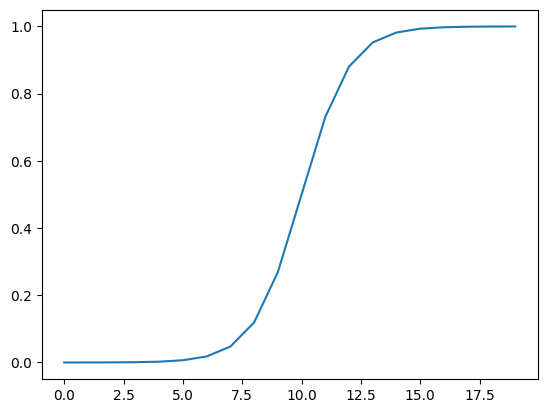

In [ ]:
plt.plot(sigomoid(A))

In [ ]:
def tanh(x):
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

tanh(A)

tensor([[-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-0.9999],
        [-0.9993],
        [-0.9951],
        [-0.9640],
        [-0.7616],
        [ 0.0000],
        [ 0.7616],
        [ 0.9640],
        [ 0.9951],
        [ 0.9993],
        [ 0.9999],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000]])

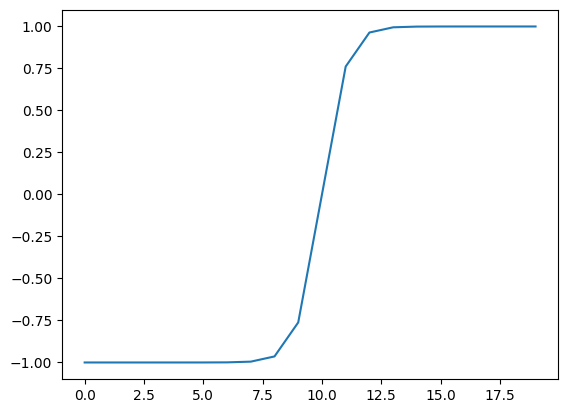

In [ ]:
plt.plot(tanh(A))

### MULTI-CLASS CLASSIFICATION

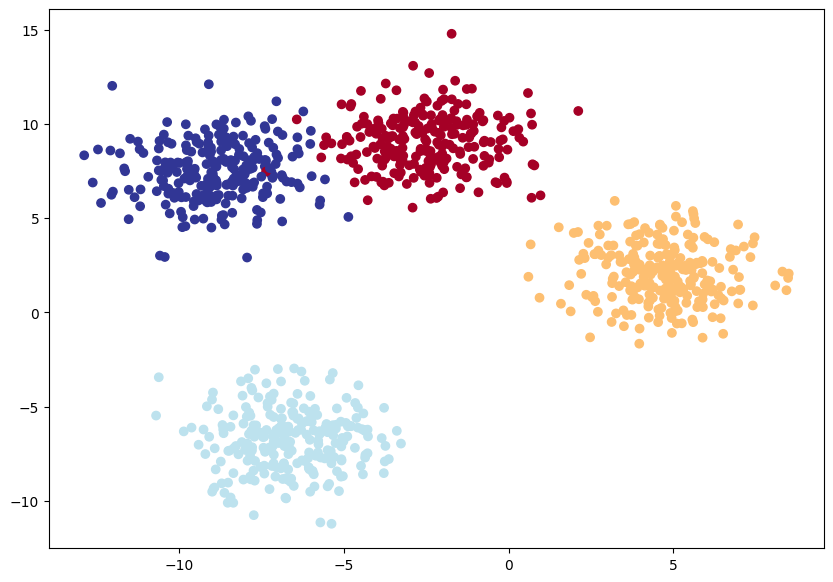

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np

# Install missing module
!pip install scikit-learn

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data

# Replace center_std with cluster_std
X_blob, y_blob = make_blobs(n_samples= 1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std = 1.5, # Corrected parameter name
                            random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                      y_blob,
                                                                      test_size=0.2,
                                                                      random_state=RANDOM_SEED)

plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units):
    super().__init__()
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(nn.Linear(in_features=input_features, out_features=hidden_units),
                                            nn.ReLU(),
                                            nn.Linear(in_features=hidden_units, out_features = hidden_units),
                                            nn.ReLU(),
                                            nn.Linear(in_features=hidden_units, out_features=output_features)
                                            )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2,
                      output_features=4,
                      hidden_units=8).to(device)
model_4




BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

### 8.4 Getting predicition probabilities for a multi-class PyTorch model

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [ ]:
y_blob_test[:10]

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

In [ ]:
next(model_4.parameters()).device

device(type='cpu')

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_logits[:5]
y_pred_probs[:5]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])

In [ ]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_blob_test[:10]

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epoch = 100

X_blob_train = X_blob_train.to(device)
y_blob_train = y_blob_train.to(device)
X_blob_test = X_blob_test.to(device)
y_blob_test = y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()
  y_logits = model_4(X_blob_train).squeeze()
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_logits, y_blob_train.long())
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test).squeeze()
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_blob_test.long())
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_pred)
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}")


Epoch: 0 | Loss: 1.15883 | Accuracy: 40.38% | Test Loss: 1.07554 | Test Accuracy: 48.00
Epoch: 10 | Loss: 0.64476 | Accuracy: 96.75% | Test Loss: 0.66069 | Test Accuracy: 97.50
Epoch: 20 | Loss: 0.42535 | Accuracy: 98.50% | Test Loss: 0.43074 | Test Accuracy: 100.00
Epoch: 30 | Loss: 0.25294 | Accuracy: 99.12% | Test Loss: 0.24508 | Test Accuracy: 99.50
Epoch: 40 | Loss: 0.11232 | Accuracy: 99.25% | Test Loss: 0.10229 | Test Accuracy: 99.50
Epoch: 50 | Loss: 0.06627 | Accuracy: 99.25% | Test Loss: 0.05848 | Test Accuracy: 99.50
Epoch: 60 | Loss: 0.05068 | Accuracy: 99.25% | Test Loss: 0.04293 | Test Accuracy: 99.50
Epoch: 70 | Loss: 0.04300 | Accuracy: 99.25% | Test Loss: 0.03491 | Test Accuracy: 99.50
Epoch: 80 | Loss: 0.03836 | Accuracy: 99.25% | Test Loss: 0.02988 | Test Accuracy: 99.50
Epoch: 90 | Loss: 0.03525 | Accuracy: 99.25% | Test Loss: 0.02663 | Test Accuracy: 99.50
Epoch: 100 | Loss: 0.03312 | Accuracy: 99.25% | Test Loss: 0.02433 | Test Accuracy: 99.50
Epoch: 110 | Loss: 0

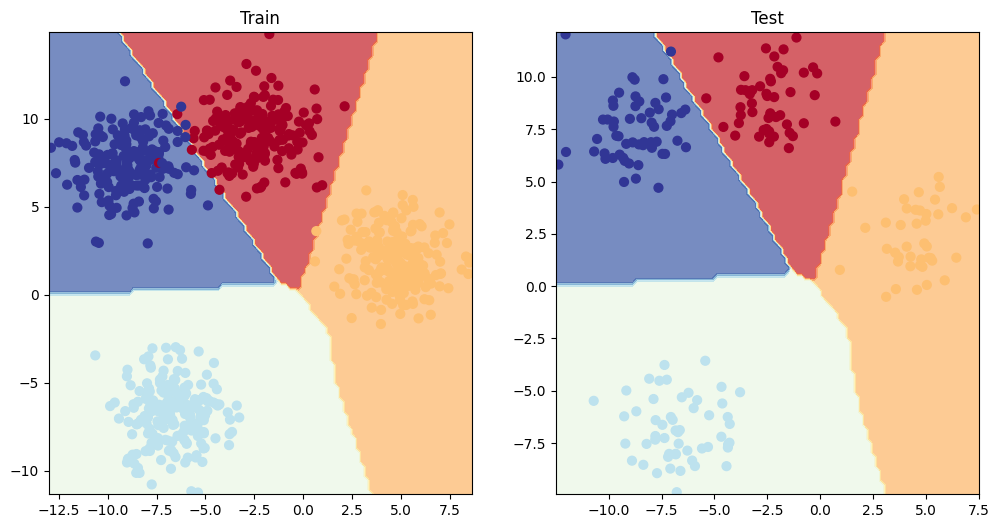

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test).squeeze()
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  y_pred[:10]
  y_blob_test[:10]
  y_pred_probs = torch.softmax(y_logits, dim=1)
  y_pred_probs[:10]
  y_pred_probs[:10].sum(dim=1)
  plt.figure(figsize=(12, 6))
  plt.subplot(1,2,1)
  plt.title("Train")
  plot_decision_boundary(model_4, X_blob_train, y_blob_train)
  plt.subplot(1,2,2)
  plt.title("Test")
  plot_decision_boundary(model_4, X_blob_test, y_blob_test)
  plt.show()

In [ ]:
!pip install torchmetrics

from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)
torchmetric_accuracy(y_pred, y_blob_test)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 15.5 MB/s eta 0:00:00


tensor(0.9950)